<a href="https://colab.research.google.com/github/RajaChowdhury/Retail-Sales-Prediction---Capstone-Project/blob/main/Colab_Notebook_Rossmann_Sales_Prediction_Raja_Chowdhury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

# <b> Problem Description </b>
---
### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# <b> Data Description </b>
---
### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### **Id** - an Id that represents a (Store, Date) duple within the test set
* #### **Store** - a unique Id for each store
* #### **Sales** (discrete)- the turnover for any given day (this is what you are predicting)
* #### **Customers**(discrete) - the number of customers on a given day
* #### **Open**(nominal) - an indicator for whether the store was open: 0 = closed, 1 = open
* #### **StateHoliday**(nominal) - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = Public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### **SchoolHoliday**(nominal) - indicates if the (Store, Date) was affected by the closure of public schools
* #### **StoreType**(nominal) - differentiates between 4 different store models: a, b, c, d
* #### **Assortment**(nominal) - describes an assortment level: a = basic, b = extra, c = extended
* #### **CompetitionDistance**(continuous) - distance in meters to the nearest competitor store
* #### **CompetitionOpenSince[Month/Year]**(discrete) - gives the approximate year and month of the time the nearest competitor was opened
* #### **Promo**(nominal) - indicates whether a store is running a promo on that day
* #### **Promo2**(nominal) - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### **Promo2Since[Year/Week]**(discrete) - describes the year and calendar week when the store started participating in Promo2
* #### **PromoInterval**(discrete) - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store
* #### **DayOfWeek** (ordinal) - Day of the week, using 1-7 for Monday - Sunday respectively
* #### **Date** (Date) - Date of the entry

# **Introduction to Rossmann**
---
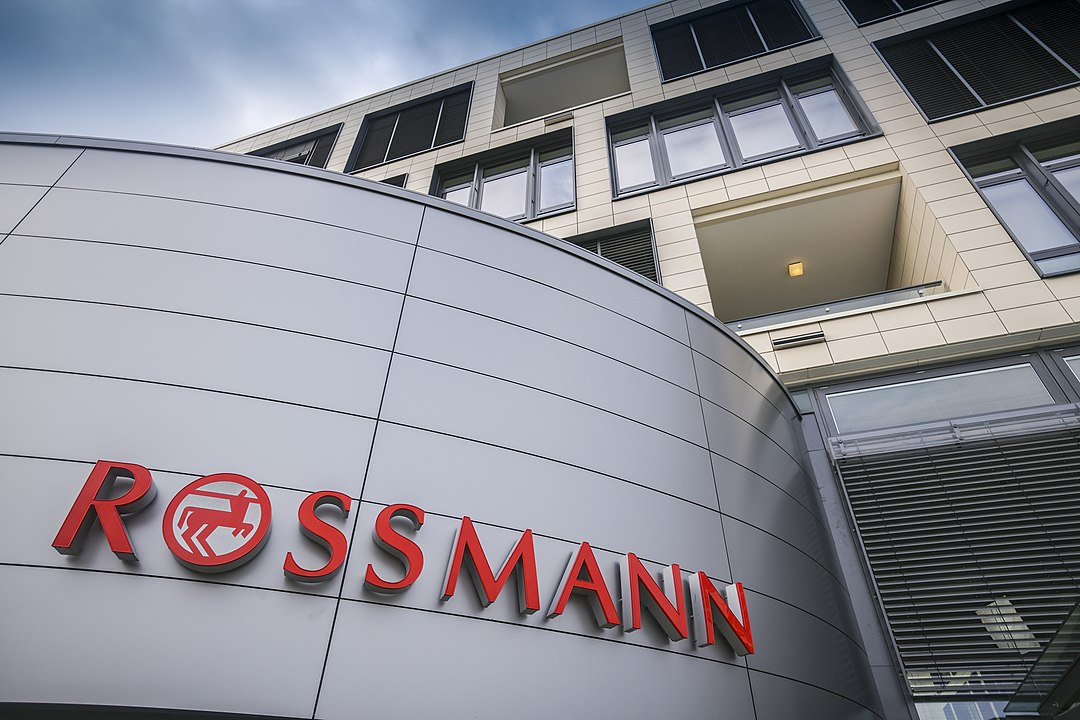

**Dirk Rossmann GmbH**, commonly referred to as **Rossmann**, is one of the largest drug store chains in Europe with around 56,200 employees and more than 4000 stores. The company was founded in 1972 by Dirk Rossmann with its headquarters in Burgwedel near Hanover in Germany. The Rossmann family owns 60% of the company. The Hong Kong-based A.S. Watson Group owns 40%, which was taken over from the Dutch Kruidvat in 2004.

In 2019 Rossmann had more than €10 billion turnover in Germany, Poland, Hungary, the Czech Republic, Turkey, Albania, Kosovo and Spain. In 2021, sales increased by 8.1 percent to 11.1 billion euros. There are a total of 4,361 Rossmann branches, 2,231 of which are in Germany.

The product range includes up to 21,700 items and can vary depending on the size of the shop and the location. In addition to drugstore goods with a focus on skin, hair, body, baby and health, Rossmann also offers promotional items ("World of Ideas"), pet food, a photo service and a wide range of natural foods and wines. There is also a perfume range with around 200 commercial brands. Rossmann has 29 private brands with 4600 products (as of 2019). In 1997, the first own brands Babydream, Facelle, Sunozon and Winston were introduced. The best-known Rossmann brands are Isana (skin, hair and body care), Alterra (natural cosmetics), domol (cleaning and laundry detergents) alouette (paper tissues etc). 



# **Steps Performed In This ML(Supervised) Project**
---

Handling dataset with the fundamental steps to unvail the factors :

* Importing Libraries And Loading The Datasets
* Overview Of The Datasets 
    *   Reading & Inspection Of First Dataset
    *   Reading & Inspection Of Second Dataset
    *   Merging both the datasets
    *   Further analysing both the datasets
* Data Wrangling And Processing
    *   Converting Dtype Of Feature
    *   Extracting Date
    *   Combining And Creating Columns
    *   Null Value Treatment
    *   Handling Outliers
* Exploratory Data Analysis
* Key Findings From EDA
* Feature Engineering 
    *   Feature Selection
    *   Multicollinearity
    *   Dependent Variable Transformation
    *   Scaling Numberical Features
    *   Dummification
* ML Model
    *   Train-Test Split
    *   Model Training And Prediction
  * Linear Regression
  * Lasso Regression
  * Ridge Regression
  * Decision Tree Regression
  * Random Forest Regression
  * Gradient Boosting Regression
  * XGboost Regression
* Conclusions 


# <b>1. Importing Required Libraries And Loading The Datasets
---

**Importing Liabraries**

In [24]:
# Importing Essential Libraries
import pandas as pd
import numpy as np
from pandas import datetime as dt
from pandas import Series,DataFrame
import datetime

# Importing Libraries For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats


# Importing Matrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


# Importing Libraries For ML Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
#from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor


# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

**Mounting The Drive**

In [25]:
# Mounting My Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading The Datasets**

In [26]:
# Loading My Datasets
df1 = pd.read_csv("/content/drive/MyDrive/Retail Sales Prediction - Capstone Project- Raja Chowdhury/Rossmann Stores Data.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Retail Sales Prediction - Capstone Project- Raja Chowdhury/store.csv")

# **2. Overview Of The Datasets**

---



### **First Dataset**

In [27]:
# Top 10 Rows Of The Dataset
df1.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [28]:
# Descriptive Statistic Aspects Of The Dataset.
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [29]:
# Concise Summary Of The Dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


**This dataset(df1) has 9 columns and 1,017,209 rows. Rather than have a unique primary key, it lists number of sales and customers for each store for each day from Jan 01, 2013 through July 31, 2015. It almost entirely numerical or date data, including the use of binary flags to indicate if the store was open, running a promo, and if it was a school holiday. The StateHoliday column is an exception in that it uses a binary flag 0 if there was no state holiday, but a letter 'a'-'c' to list the type of holiday if there was one**

### **Second Dataset**

In [30]:
# Top 10 Rows Of The Dataset
df2.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [31]:
# Descriptive Statistic Aspects Of The Dataset.
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


In [32]:
# Concise Summary Of The Dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**This dataset(df2) has 10 columns and 1,115 rows. It has a primary key Store that has a unique integer for each of the 1,115 stores. It gives us static information about each store such as the model and assortment of the store, information about the nearest competitor store, and whether or not they participate in the consecutive promotion "Promo2". Largely we're looking at numerical and date data, but Store Type and Assortment are flagged with letters to indicate store models and assorment level, per the variable explanations, as well as the PromoInterval column listing abbreviated months.**

### **After Merging Both The Datasets**

---


**Now we will merge both tables into one so we can more easily work with them. We will join the tables based on the shared Store column, which is a foreign key in the first dataset and a primary key in the secound dataset.**

In [33]:
# Merging Both The Datasets On The Store column

df = df1.merge(df2,how='inner',left_on='Store',right_on='Store')

In [34]:
# Top 10 Rows Of The Dataframe
df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [35]:
# Bottom 10 Rows Of The Dataframe
df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017199,1115,4,2013-01-10,5007,339,1,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017200,1115,3,2013-01-09,4649,324,1,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017201,1115,2,2013-01-08,5243,341,1,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017202,1115,1,2013-01-07,6905,471,1,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017203,1115,7,2013-01-06,0,0,0,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [36]:
# Shape Of The Dataframe

Row, Column = df.shape
print(f"Number 0f rows is {Row}")
print(f"Number 0f columns is {Column}")

Number 0f rows is 1017209
Number 0f columns is 18


In [37]:
# Columns Of Our Dataframe
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [38]:
# Descriptive Statistic Aspects Of The Dataframe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,1017209.0,NaN,NaN,NaN,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,NaN,NaN,NaN,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Date,1017209,942,2015-07-31,1115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,1017209.0,NaN,NaN,NaN,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,NaN,NaN,NaN,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,NaN,NaN,NaN,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,NaN,NaN,NaN,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
StateHoliday,1017209,5,0,855087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SchoolHoliday,1017209.0,NaN,NaN,NaN,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
StoreType,1017209,4,a,551627,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Note: We can see some outliers in our dataframe.**

In [39]:
# Concise Summary Of The Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

**Note: We can see some null values in our dataframe.**

In [40]:
# Number Of Unique Values In Each Numberical Columns
columns = [ 'Open', 'Promo', 'Promo2', 'SchoolHoliday',  'DayOfWeek', 'CompetitionOpenSinceMonth',  'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']

for col in columns:
    print(col)
    print(sorted(df[col].unique()))

Open
[0, 1]
Promo
[0, 1]
Promo2
[0, 1]
SchoolHoliday
[0, 1]
DayOfWeek
[1, 2, 3, 4, 5, 6, 7]
CompetitionOpenSinceMonth
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, nan]
CompetitionOpenSinceYear
[1900.0, 1961.0, 1990.0, 1994.0, 1995.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, nan]
Promo2SinceWeek
[nan, 1.0, 5.0, 6.0, 9.0, 10.0, 13.0, 14.0, 18.0, 22.0, 23.0, 26.0, 27.0, 28.0, 31.0, 35.0, 36.0, 37.0, 39.0, 40.0, 44.0, 45.0, 48.0, 49.0, 50.0]
Promo2SinceYear
[nan, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0]


**Note: Some columns are unnecessarily in float type.**

In [41]:
# Number Of Value Count In Each Object Type Column
for column in df:
    if df[column].dtype == object:
        print(df[column].value_counts())

2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64
0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64
a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64
a    537445
c    471470
b      8294
Name: Assortment, dtype: int64
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64


**Note: State holiday has two zero(0) category.**

# **3. Data Wrangling And Processing**

---



### **Changing Dtype Of Columns**

**CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, and Promo2SinceYear columns are only using whole numbers and they are a discrete value, So we will change them from floats to integers.**

In [42]:
# Changing the dtypes of the following columns from float dtype to int dtype.

df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].convert_dtypes()
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].convert_dtypes()
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].convert_dtypes()
df['Promo2SinceYear'] = df['Promo2SinceYear'].convert_dtypes()

In [43]:
# Converting the Dtype of Date column from Object type To DateTime 

df["Date"]=pd.to_datetime(df["Date"])

In [44]:
# Checking dtypes of the coumns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

### **Extracting Date**

In [45]:
# Checking Our Dataset Period

df.Date.unique()

array(['2015-07-31T00:00:00.000000000', '2015-07-30T00:00:00.000000000',
       '2015-07-29T00:00:00.000000000', '2015-07-28T00:00:00.000000000',
       '2015-07-27T00:00:00.000000000', '2015-07-26T00:00:00.000000000',
       '2015-07-25T00:00:00.000000000', '2015-07-24T00:00:00.000000000',
       '2015-07-23T00:00:00.000000000', '2015-07-22T00:00:00.000000000',
       '2015-07-21T00:00:00.000000000', '2015-07-20T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000', '2015-07-18T00:00:00.000000000',
       '2015-07-17T00:00:00.000000000', '2015-07-16T00:00:00.000000000',
       '2015-07-15T00:00:00.000000000', '2015-07-14T00:00:00.000000000',
       '2015-07-13T00:00:00.000000000', '2015-07-12T00:00:00.000000000',
       '2015-07-11T00:00:00.000000000', '2015-07-10T00:00:00.000000000',
       '2015-07-09T00:00:00.000000000', '2015-07-08T00:00:00.000000000',
       '2015-07-07T00:00:00.000000000', '2015-07-06T00:00:00.000000000',
       '2015-07-05T00:00:00.000000000', '2015-07-04

**Note: We have dataset for a period of approx 2years and 7 months (From 1st January,2013 to 31st July,2015)**

In [46]:
# Extracting Date,Year,Month,Day,Week,WeekOfYear from Date column for dataset transformation

df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

**Here we have extracted Year, Month and  Day from Date column for further analysis.**

In [47]:
# After Extracting, Date Column Becomes Irrelevant So Dropping It

df=df.drop(['Date'],axis=1) 

### **Combining And Creating columns**



---


**PromoOpen**

---



In [48]:
# Creating New Column From Existing Columns
df["PromoOpen"] = (12* (df["Year"]-df["Promo2SinceYear"])) + df["Month"]-((df["Promo2SinceWeek"]/4))

**Here we have created new column called "PromoOpen" from existing columns to measure more accurate period(in Months) from when the store was participating in the Promo2.**

In [49]:
#Lets Check Our Columns
df[['Promo','Promo2','PromoInterval','Promo2SinceYear', 'Promo2SinceWeek', 'PromoOpen']].sample(10)

,Promo,Promo2,PromoInterval,Promo2SinceYear,Promo2SinceWeek,PromoOpen
305711,0,0,NaN,<NA>,<NA>,<NA>
755206,1,0,NaN,<NA>,<NA>,<NA>
77585,0,0,NaN,<NA>,<NA>,<NA>
25875,0,0,NaN,<NA>,<NA>,<NA>
930427,0,0,NaN,<NA>,<NA>,<NA>
629934,0,0,NaN,<NA>,<NA>,<NA>
1000294,1,0,NaN,<NA>,<NA>,<NA>
781529,1,1,"Jan,Apr,Jul,Oct",2014,40,4.0
680918,0,1,"Jan,Apr,Jul,Oct",2011,14,31.5
148085,1,1,"Jan,Apr,Jul,Oct",2010,13,62.75


In [50]:
# Checking PromoOpen Negative figures 
df[df["PromoOpen"]<0].head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,PromoOpen
17926,20,1,9229,954,1,1,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,30,-4.0
17927,20,7,0,0,0,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,29,-4.0
17928,20,6,5572,566,1,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,28,-4.0
17929,20,5,7149,839,1,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,27,-4.0
17930,20,4,8118,997,1,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,26,-4.0
17931,20,3,7212,911,1,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,25,-4.0
17932,20,2,7104,854,1,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,24,-4.0
17933,20,1,7856,946,1,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,23,-4.0
17934,20,7,0,0,0,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,22,-4.0
17935,20,6,4862,499,1,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,21,-4.0


In [51]:
# Replacing Those Negative Figures With Zero 
df.loc[df["PromoOpen"]<0, "PromoOpen" ] = 0

**Here PromoOpen column has figures in negative which indicates that the store have not started any promo yet. So we have replace those negative figures with zero**.



---


**CompetitionOpen**

---



In [52]:
# Creating New Column From Existing Columns
df["CompetitionOpen"] = (12* (df["Year"]-df["CompetitionOpenSinceYear"])) + (df["Month"]-df["CompetitionOpenSinceMonth"])

**Here we have created new column called "CompetitionOpen" from existing columns to measure the period(in months) from whem the nearest competition has opened.**

In [53]:
#Lets Check Our Columns
df[['CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(10)

,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
121510,1200.0,2008,9,74
436760,320.0,2005,12,106
95060,6190.0,<NA>,<NA>,<NA>
399518,1350.0,2009,9,65
855375,1340.0,<NA>,<NA>,<NA>
696130,26490.0,<NA>,<NA>,<NA>
696943,25430.0,1999,5,168
398089,430.0,<NA>,<NA>,<NA>
558612,250.0,2007,6,87
281635,2290.0,<NA>,<NA>,<NA>


In [54]:
# Checking CompetitionOpen Negative figures 
df[df["CompetitionOpen"]<0].head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,PromoOpen,CompetitionOpen
3890,5,2,7692,659,1,1,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,3,31,<NA>,-1
3891,5,1,8847,770,1,1,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,3,30,<NA>,-1
3892,5,7,0,0,0,0,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,3,29,<NA>,-1
3893,5,6,2038,219,1,0,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,3,28,<NA>,-1
3894,5,5,4181,499,1,0,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,3,27,<NA>,-1
3895,5,4,3711,460,1,0,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,3,26,<NA>,-1
3896,5,3,4325,613,1,0,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,3,25,<NA>,-1
3897,5,2,4073,537,1,0,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,3,24,<NA>,-1
3898,5,1,4028,540,1,0,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,3,23,<NA>,-1
3899,5,7,0,0,0,0,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,3,22,<NA>,-1


In [55]:
# Replacing Those Negative Figures With Zero
df.loc[df["CompetitionOpen"]<0, "CompetitionOpen" ] = 0

**Here CompetitionOpen column has figures in negative which indicates that the store do not have any competition. So we have replace those negative figures with zero**.

In [56]:
# Finally Dropping Irrelevant COlumns
df = df.drop(["Promo2SinceYear","Promo2SinceWeek","CompetitionOpenSinceYear","CompetitionOpenSinceMonth"], axis=1) 



---


**StateHoliday**

---



In [57]:
# Checking StateHoliday column values and its counts
df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [58]:
# Replacing value with 0 integer 
df['StateHoliday']= df['StateHoliday'].replace('0',0)

**Here we have replaced zero value with another integer zero value.**

In [59]:
# Checking StateHoliday column values and its counts
df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

### **Null Value Treatment**

In [60]:
#Checking the number of Null Values in our columns.
for i in df.columns:
    ab = df[i].isnull().sum()
    if ab != 0:
        print(i + " column has {} null values.".format(ab))
        print()

CompetitionDistance column has 2642 null values.

PromoInterval column has 508031 null values.

PromoOpen column has 508031 null values.

CompetitionOpen column has 323348 null values.



**Note: PromoInterval and PromoOpen has similar number of null values which means when promo is not open then promo have no interval as well.**

In [61]:
# Checking the percentage of Null Values in our columns.
Total = df.isnull().sum().sort_values(ascending=False)
Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([Total,Percentage], axis=1, keys=['Total','Percentage']) 
print(missing_value)

                      Total  Percentage
PromoOpen            508031   49.943620
PromoInterval        508031   49.943620
CompetitionOpen      323348   31.787764
CompetitionDistance    2642    0.259730
DayOfWeek                 0    0.000000
Day                       0    0.000000
Month                     0    0.000000
Year                      0    0.000000
Promo2                    0    0.000000
Store                     0    0.000000
StoreType                 0    0.000000
SchoolHoliday             0    0.000000
StateHoliday              0    0.000000
Promo                     0    0.000000
Open                      0    0.000000
Customers                 0    0.000000
Sales                     0    0.000000
Assortment                0    0.000000


In [62]:
# We can see that the number of null value present in PromoOpen and PromoInterval is same as the number of time promo2 was not running.

print("0 = store is not participating, 1 = store is participating")
df.Promo2.value_counts()

0 = store is not participating, 1 = store is participating


1    509178
0    508031
Name: Promo2, dtype: int64

In [63]:
print(df[df['Promo2'] == 0].shape[0])
print(df['PromoOpen'].isna().sum())
print(df['PromoInterval'].isna().sum())

508031
508031
508031


**Note: From the above analysis we can see that the number of null values present in PromoOpen and PromoInterval is same as the number of time when store was not participating in Promo2.**

In [64]:
# Checking dataset when Promo2 is zero
df[df["Promo2"]==0].sample(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Year,Month,Day,PromoOpen,CompetitionOpen
69314,76,1,7992,820,1,0,0,0,d,c,19960.0,0,NaN,2013,3,11,<NA>,84
415358,455,5,7175,433,1,0,0,1,d,c,7660.0,0,NaN,2013,1,4,<NA>,28
589009,647,6,4322,487,1,0,0,0,a,c,7420.0,0,NaN,2014,8,16,<NA>,16
805177,883,2,6254,624,1,1,0,0,a,a,3200.0,0,NaN,2013,4,23,<NA>,94
30334,33,3,6258,721,1,0,0,0,a,c,1320.0,0,NaN,2013,1,16,<NA>,0
445497,488,6,4269,452,1,0,0,0,a,c,2890.0,0,NaN,2013,8,3,<NA>,0
661098,727,4,4528,452,1,0,0,0,a,a,2050.0,0,NaN,2015,7,9,<NA>,100
805844,884,2,4155,435,1,0,0,0,d,c,7550.0,0,NaN,2013,7,23,<NA>,<NA>
860684,945,3,4153,559,1,0,0,0,a,c,12480.0,0,NaN,2014,9,10,<NA>,42
951176,1043,3,6102,1054,1,0,0,1,c,a,420.0,0,NaN,2013,8,21,<NA>,89


**We can see that whenever the store was not participating in Promo2, we had null values present in PromoOpen and PromoInterval columns as well.**

In [65]:
# Making function for imputing zero in place of null values
def impute_zero(series):
    return series.fillna(0)

df.PromoOpen = df['PromoOpen'].transform(impute_zero)
df.PromoInterval = df['PromoInterval'].transform(impute_zero)

**Here we have imputed zero in place of null values present in PromoOpen and PromoInterval columns because logically when promo2 is zero then PromoOpen and PromoInterval should be zero too.**

Text(0.5, 1.0, 'Distribution of Store Competition Distance')

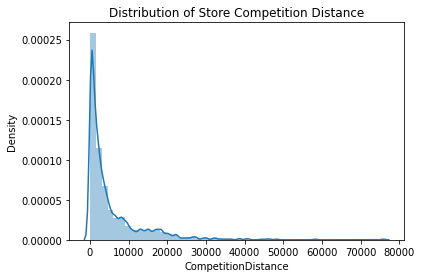

In [66]:
# let's first have a look at its distribution of CompetitionDistance

sns.distplot(df.CompetitionDistance)
plt.title("Distribution of Store Competition Distance")

In [67]:
# Filling null values using median as CompetitionDistance column is skewed towards right

df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace = True) 

In [68]:
# Filling null values using mode as CompetitionOpen column is made by combining the two categorical columns

df['CompetitionOpen'].fillna(df['CompetitionOpen'].mode()[0], inplace = True)

In [69]:
#Better To Double Check
df.isnull().sum()

Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
PromoInterval          0
Year                   0
Month                  0
Day                    0
PromoOpen              0
CompetitionOpen        0
dtype: int64

### **Handling Outliers**

In [70]:
# let's look at the statistical aspects of the dataframes for determining outliners.
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Day,PromoOpen,CompetitionOpen
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422034e+03,5.005638e-01,2.013832e+03,5.846762e+00,1.570279e+01,1.308429e+01,4.203993e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706913e+03,4.999999e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.897466e+01,6.534447e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,1.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,0.000000e+00,1.600000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,1.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,2.500000e+01,7.300000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,7.125000e+01,1.386000e+03


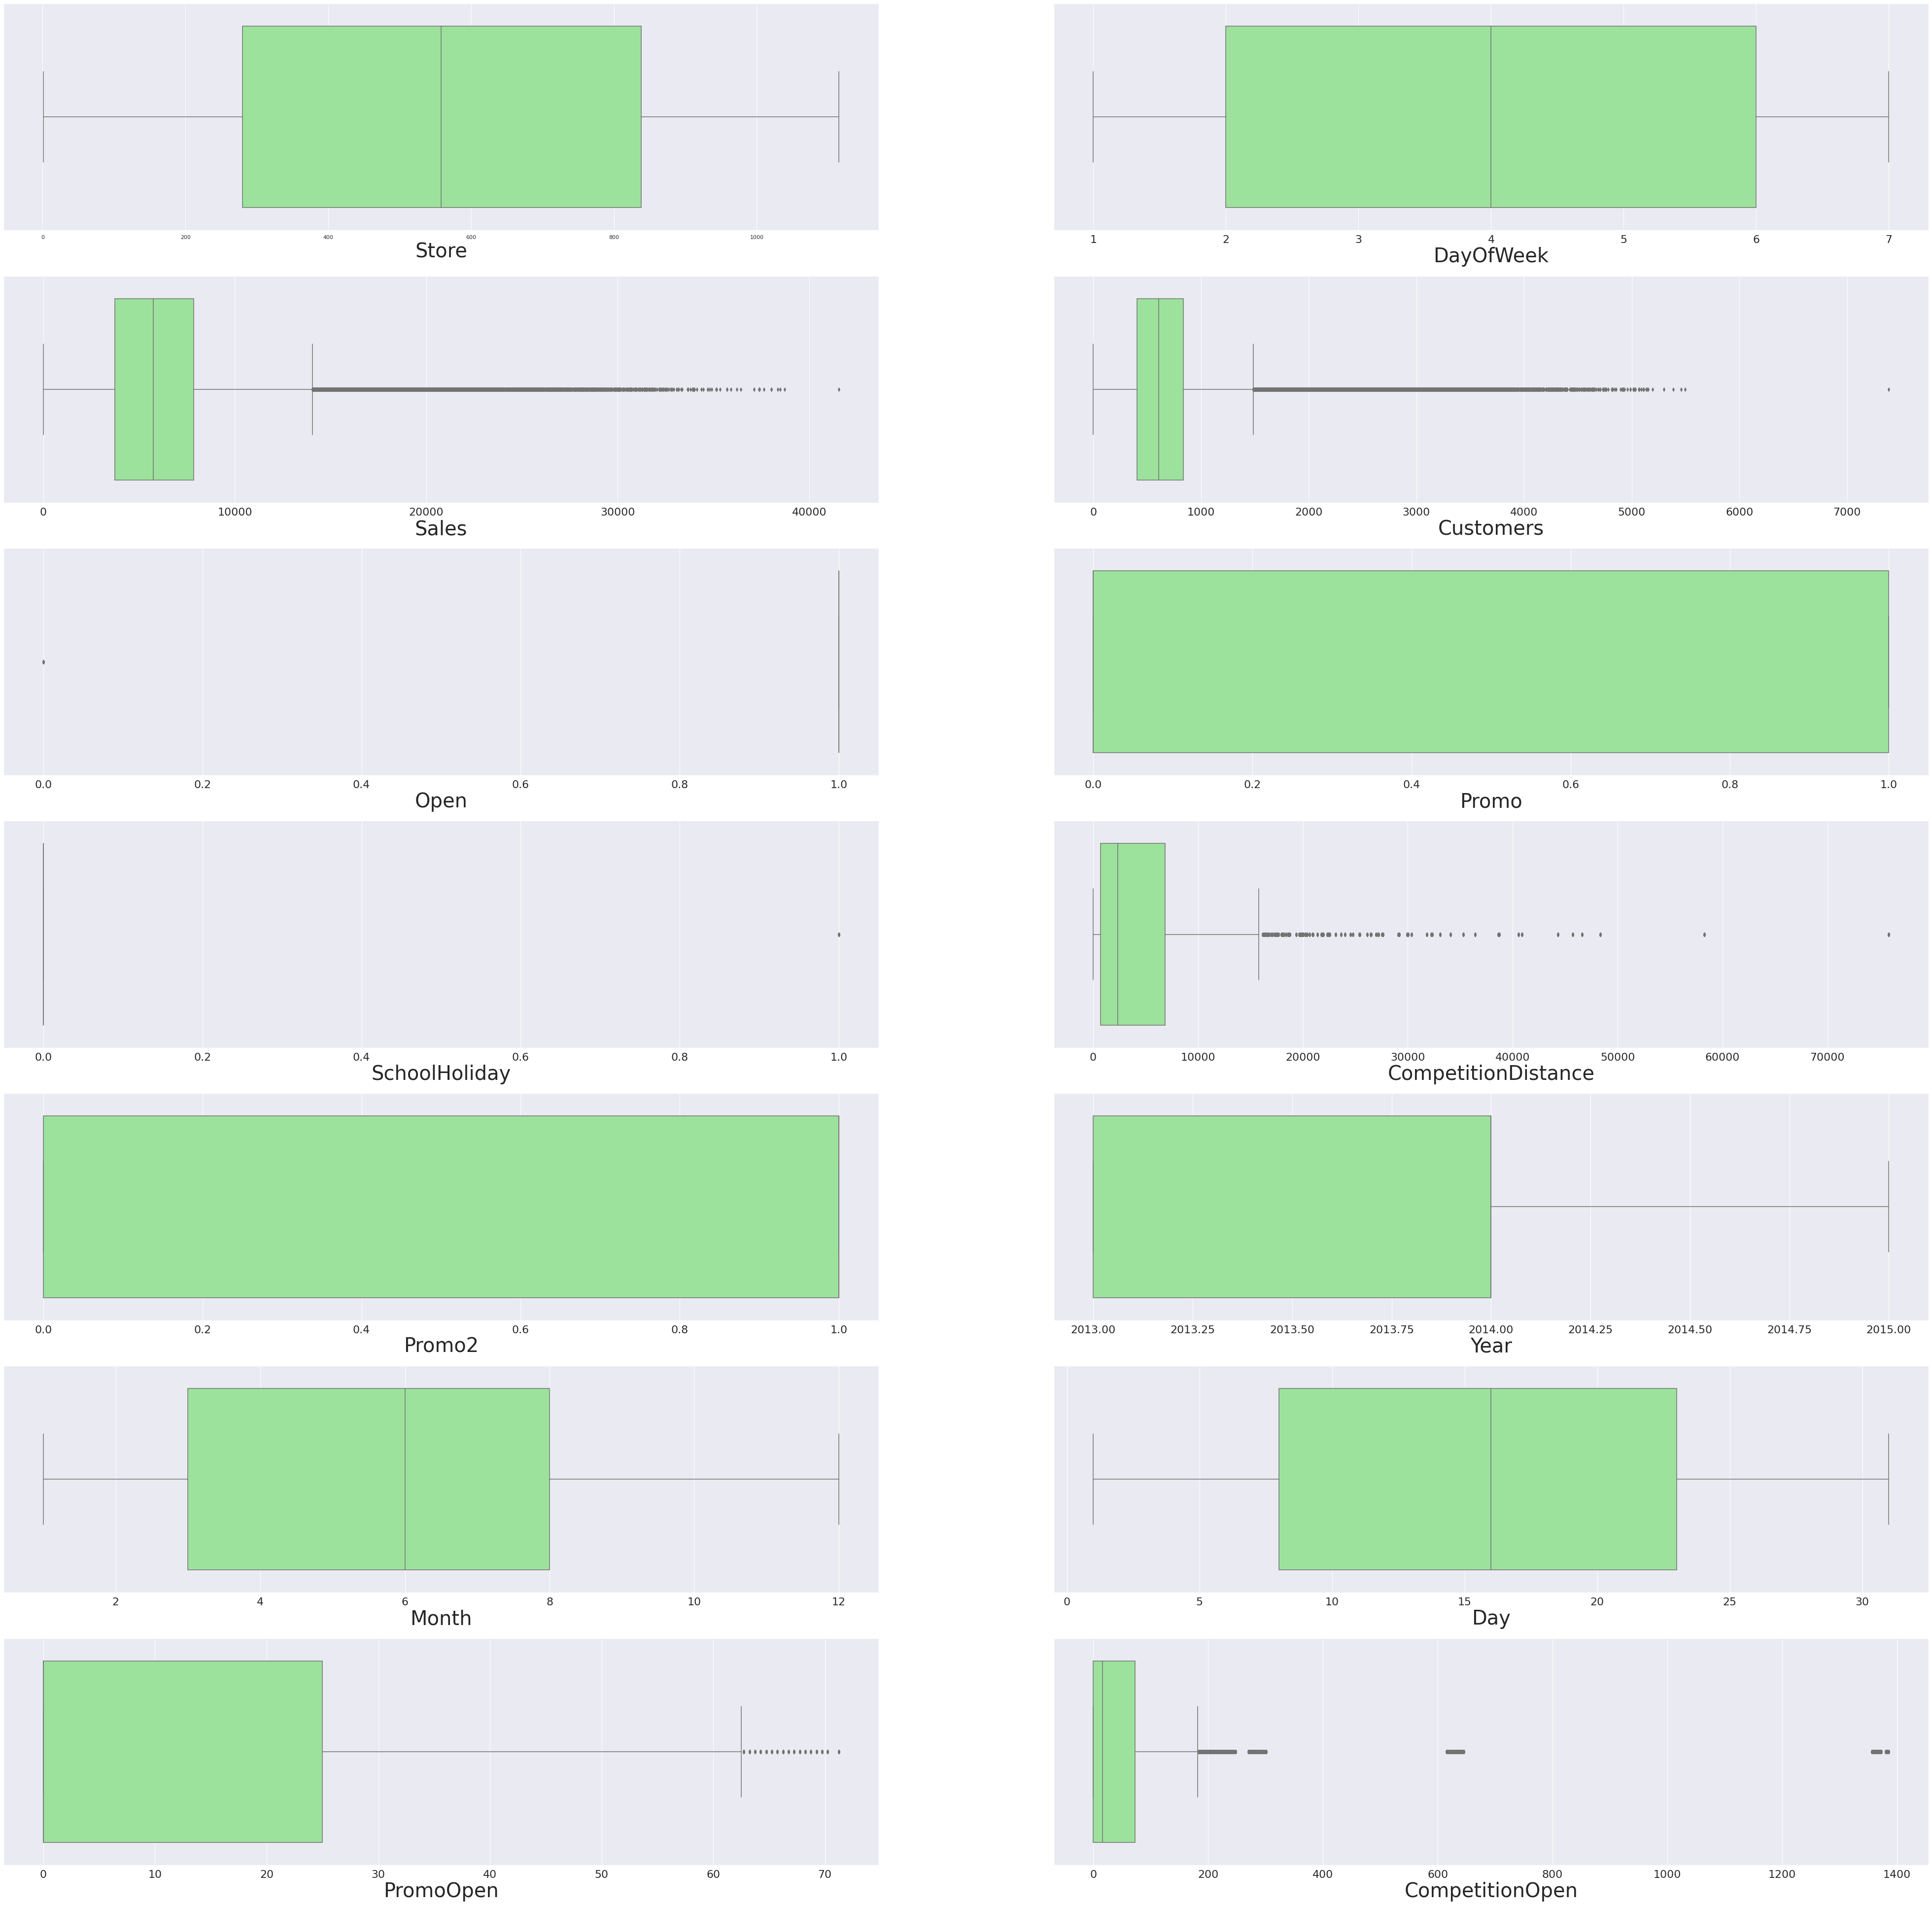

In [71]:
# Box plot to detect outliers

lst_box = df.describe().columns
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
  plt.subplot(10, 2, i[0]+1)
  sns.set(font_scale = 2)
  sns.boxplot(df[i[1]], color= 'lightgreen')
  plt.xlabel(i[1], fontsize=40)


In [72]:
# Removing outliers using z score method on sales column.
df['z_sale'] = np.abs(stats.zscore(df['Sales']))
df = df[(df['z_sale'] < 3)]
df.drop(['z_sale'],axis=1,inplace=True)

In [73]:
# Removing outliers using z score method on customers column.
df['z_customer'] = np.abs(stats.zscore(df['Customers']))
df = df[(df['z_customer'] < 3)]
df.drop(['z_customer'],axis=1,inplace=True)

In [74]:
# Shape of our dataset after removing outliers
df.shape

(996977, 18)

**Here 'Sales' and 'Customers' are very important columns so outliers in these columns may affect our prediction tremendously therefore we have removed them using z score method and we tried to remove least number of rows required, by only removing those rows which does not follow the trend pattern.**

In [75]:
#Capping the outlier rows with Percentiles

upper_lim = df['CompetitionDistance'].quantile(.95)
lower_lim = df['CompetitionDistance'].quantile(.05)
df.loc[(df["CompetitionDistance"] > upper_lim),"CompetitionDistance"] = upper_lim
df.loc[(df["CompetitionDistance"] < lower_lim),"CompetitionDistance"] = lower_lim

upper_lim = df['CompetitionOpen'].quantile(.95)
lower_lim = df['CompetitionOpen'].quantile(.05)
df.loc[(df["CompetitionOpen"] > upper_lim),"CompetitionOpen"] = upper_lim
df.loc[(df["CompetitionOpen"] < lower_lim),"CompetitionOpen"] = lower_lim

upper_lim = df['PromoOpen'].quantile(.95)
lower_lim = df['PromoOpen'].quantile(.05)
df.loc[(df["PromoOpen"] > upper_lim),"PromoOpen"] = upper_lim
df.loc[(df["PromoOpen"] < lower_lim),"PromoOpen"] = lower_lim


**Here we have replaced outliers with different percentile values using capping method as the number of outliers were huge.**

# **4. Exploratory Data Analysis**


---



Text(0.5, 1.0, 'Count Of Store Models')

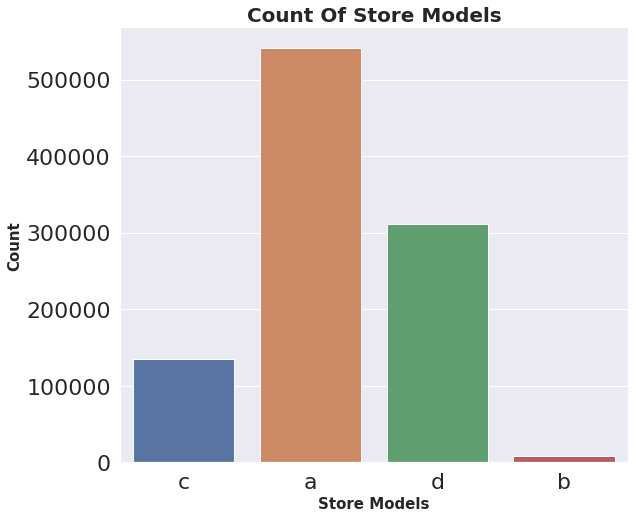

In [76]:
# Plotting a subplot bar graph for Store Models
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ax = sns.countplot(df['StoreType'])
ax.set_xlabel('Store Models',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"})
ax.set_title("Count Of Store Models",fontsize=20,fontdict={"weight": "bold"})

**Here we can infer that 'a' Store Model have the maximum number of sales and store counts followed by 'd' while Store Model 'b' have the least number of sales and store counts.**

Text(0.5, 0, 'Store Models')

<Figure size 1440x360 with 0 Axes>

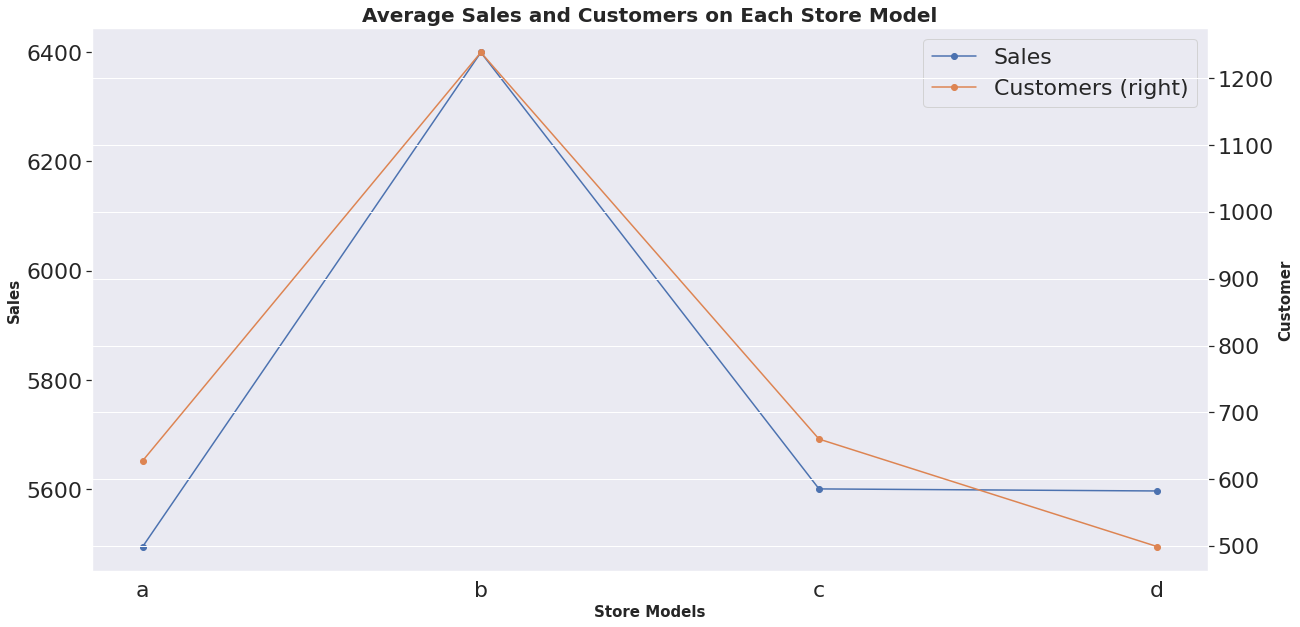

In [77]:
# Plotting Average sales and customers on each store model using line graph
plt.figure(figsize=(20,5))
ax = df.groupby('StoreType')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(20,10), marker='o')
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customer',size=15,fontdict={"weight": "bold"})
plt.title('Average Sales and Customers on Each Store Model',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('Store Models',size=15,fontdict={"weight": "bold"})

**Here it is surprising to see that store model "b" which had least number of store counts performs quite well on average sales and customers compared to other store models.**  

Text(0.5, 1.0, 'Count Of Assortment Levels')

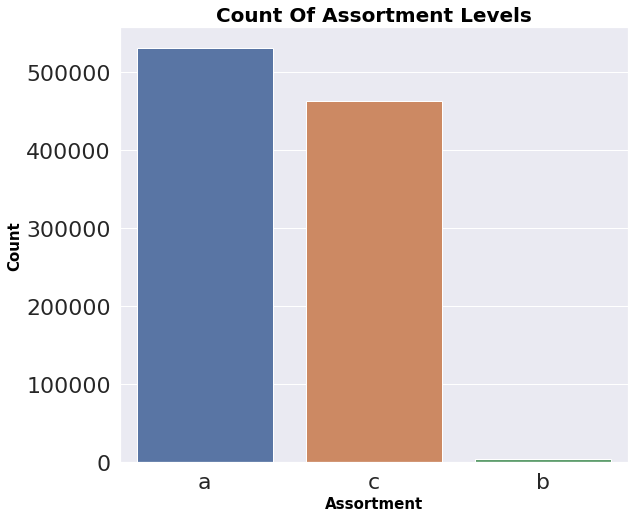

In [78]:
#  Plotting a subplot bar graph for Assortment
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
ax=sns.countplot(df['Assortment'])
ax.set_xlabel('Assortment',size=15,fontdict={"weight": "bold"}, color='black')
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"}, color='black')
ax.set_title("Count Of Assortment Levels",fontsize=20,fontdict={"weight": "bold"}, color='black')

**a = Basic, b = Extra, c = Extended**

**Here we can see that Basic Assortment level have the maximum number of sales and store counts followed by Extended level while Extra Assortment have the least number of sales and store counts.**

Text(0.5, 0, 'Assortment Levels')

<Figure size 1440x360 with 0 Axes>

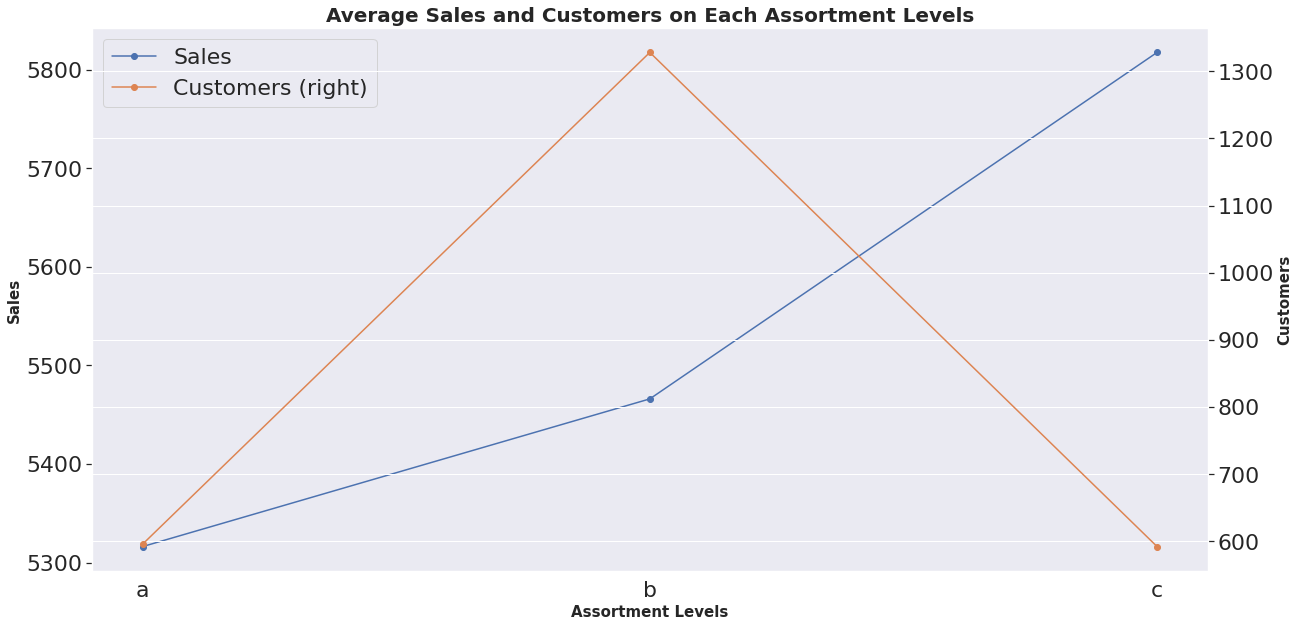

In [79]:
# Plotting Average sales and customers on each assortment level using line graph
plt.figure(figsize=(20,5))
ax = df.groupby('Assortment')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(20,10), marker='o')
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customers',size=15,fontdict={"weight": "bold"})
plt.title('Average Sales and Customers on Each Assortment Levels',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('Assortment Levels',size=15,fontdict={"weight": "bold"})

**Here again it is surprising to see that Assortment level "b" which had least store counts have perform quite well compared to "a". While there is an another surprising fact that assortment level "c" have maximum number of sales with the least number of customers.**

Text(0.5, 1.0, 'Sales in Different Stores And Assortment ')

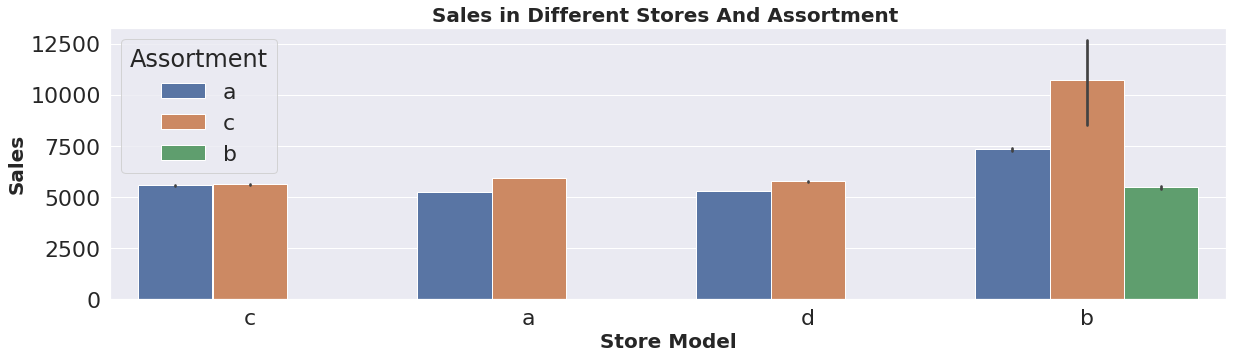

In [80]:
#Let's check the relationship between store type, assortment levels and sales
plt.figure(figsize=(20,5))
ax = sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])
ax.set_xlabel('Store Model',size=20,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=20,fontdict={"weight": "bold"})
ax.set_title("Sales in Different Stores And Assortment ",fontsize=20,fontdict={"weight": "bold"})

**Here we can see that Store Model "b" has the maximum number of sales at all assortment level and Assortment Level "b" is only available in Store Level "b".**

Text(0.5, 1.0, 'Impact of Promo on Sales and Customers')

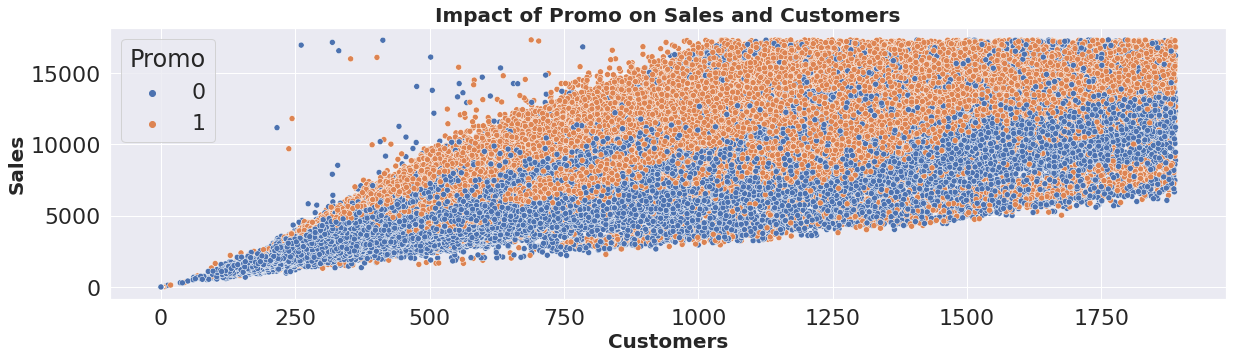

In [81]:
# Plotting Effect of Promo on Sales and Customers using scatterplot
plt.figure(figsize=(20,5))
ax = sns.scatterplot(data=df,x='Customers',y='Sales',hue='Promo',cmap=plt.cm.get_cmap('YlGn'))
ax.set_xlabel('Customers',size=20,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=20,fontdict={"weight": "bold"})
ax.set_title("Impact of Promo on Sales and Customers",fontsize=20,fontdict={"weight": "bold"})

**Here we can see from the graph that there is a linear relationship between customer and sales and it is also noticiable that whenever promo was open, the store has higher sales and customer compared to the period when promo was closed, which means promo had good impact on the sales.**

Text(0.5, 1.0, 'Sales and Promo During The week ')

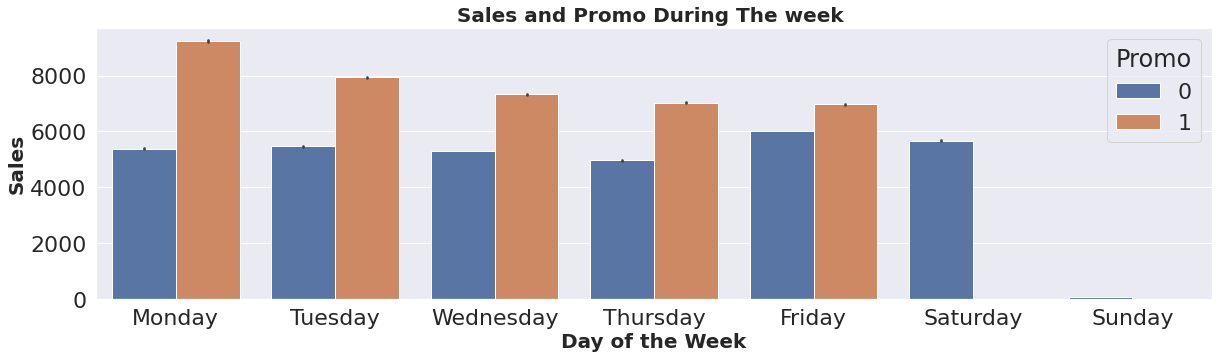

In [82]:
#Let's check the Sales and Promo During The week
plt.figure(figsize=(20,5))
ax = sns.barplot(x=df["DayOfWeek"],y=df['Sales'],hue=df["Promo"])
ax.set_xlabel('Day of the Week',size=20,fontdict={"weight": "bold"})
plt.xticks(range(0,7),labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_ylabel('Sales',size=20,fontdict={"weight": "bold"})
ax.set_title("Sales and Promo During The week ",fontsize=20,fontdict={"weight": "bold"})

**Here we can infer that promo had been provided to the customers throughout the weekdays reason why sales were also high but sales on weekends were very low as promo weren't provided to the customers.**

Text(0.5, 0, 'Date')

<Figure size 1440x360 with 0 Axes>

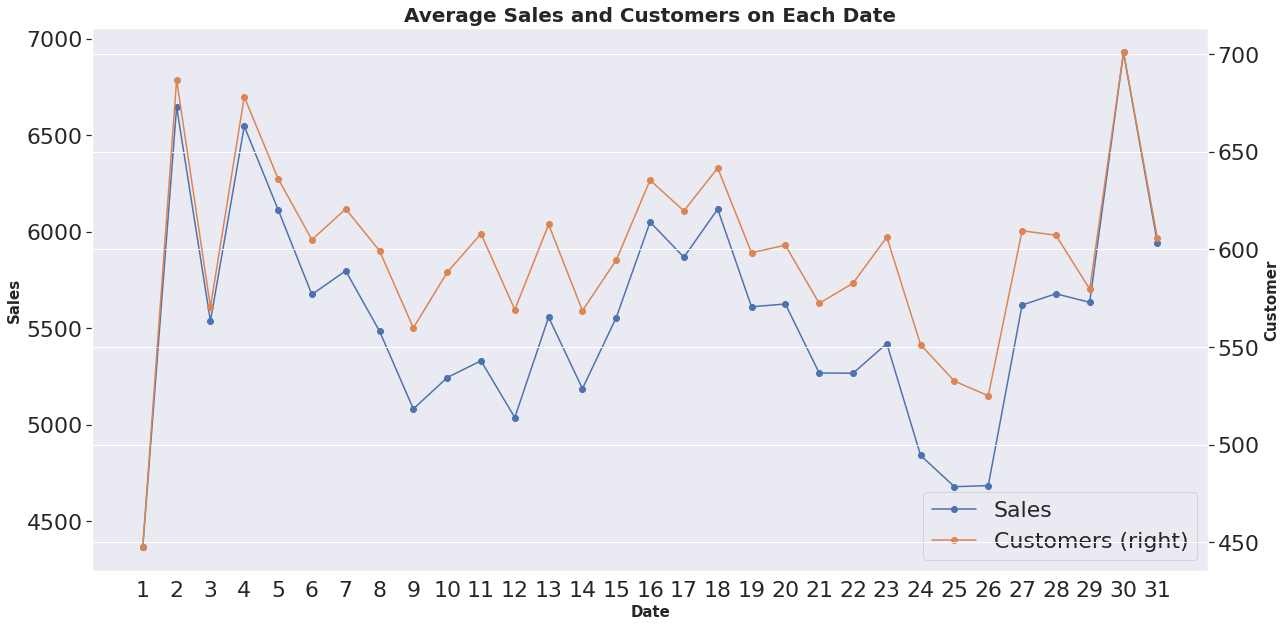

In [83]:
# Plotting Average sales and number of customers per Day using line graph
plt.figure(figsize=(20,5))
ax = df.groupby('Day')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(20,10), marker='o')
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customer',size=15,fontdict={"weight": "bold"})
ax.set_xticks(range(1,32))
plt.title('Average Sales and Customers on Each Date',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('Date',size=15,fontdict={"weight": "bold"})

**Here we can infer from the graph that the sales is highest on 30th followed by 2nd and 4th date of every month while sales is lowest on the 1st date of every month followed by 25th and 26th date.**

Text(0.5, 0, 'Day Of Week')

<Figure size 1440x360 with 0 Axes>

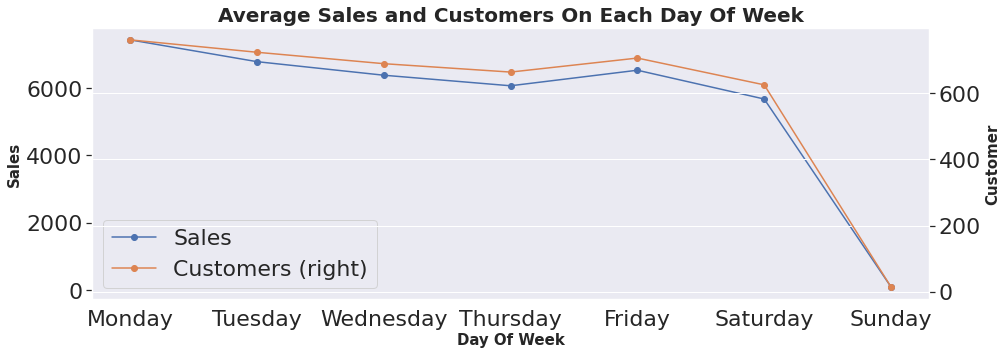

In [84]:
# Plotting Average sales and number of customers per DayOfWeek using line graph
plt.figure(figsize=(20,5))
ax = df.groupby('DayOfWeek')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(15,5), marker='o')
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customer',size=15,fontdict={"weight": "bold"})
plt.xticks(range(1,8),labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Average Sales and Customers On Each Day Of Week',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('Day Of Week',size=15,fontdict={"weight": "bold"})

**Here we can infer from the graph that the sales are at maximum on Mondays while sales are zero on Sunday because it seems like store use to remain closed on Sundays.**

Text(0.5, 0, 'Months')

<Figure size 1440x360 with 0 Axes>

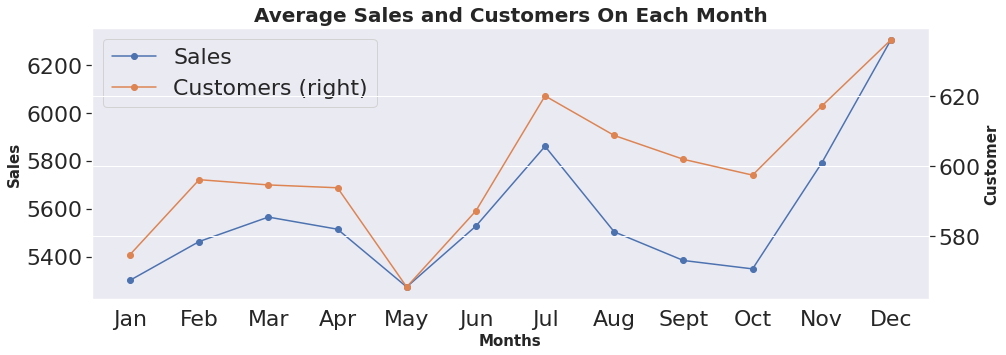

In [85]:
# Plotting Average sales and number of customers per month using line graph
plt.figure(figsize=(20,5))
ax = df.groupby('Month')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(15,5), marker='o')
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customer',size=15,fontdict={"weight": "bold"})
plt.xticks(range(1,13),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.title('Average Sales and Customers On Each Month',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('Months',size=15,fontdict={"weight": "bold"})

**Here we can see that the Sales and Customers are at peak during November and December due to festive season like Christmas while sales are at lowest during January and May or we may say these months to be off season.**

Text(0.5, 1.0, 'Sales During State Holidays')

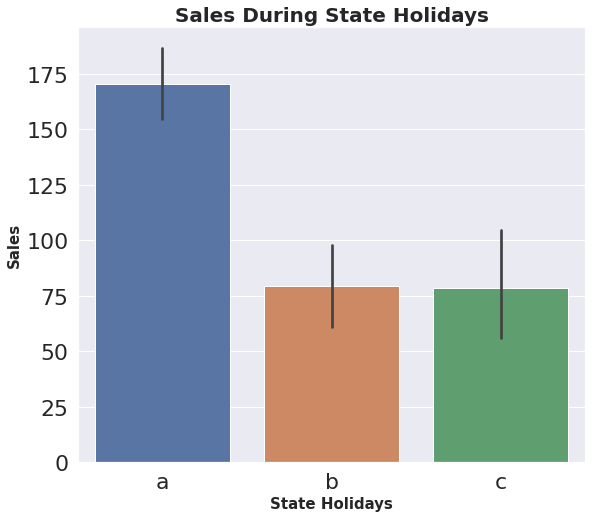

In [86]:
# countplot for sateholiday sales
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
ax = sns.barplot(data=df[(df.StateHoliday != 0) & (df.StateHoliday!= '0')],x='StateHoliday',y='Sales')
ax.set_xlabel('State Holidays',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Sales During State Holidays",fontsize=20,fontdict={"weight": "bold"})

**a = Public holiday, b = Easter holiday, c = Christmas holiday**

**Here we can see that during Public holidays store made more sales compared to Easter and Christmas holidays.**

Text(0.5, 1.0, 'Impact of School Holidays on Sales')

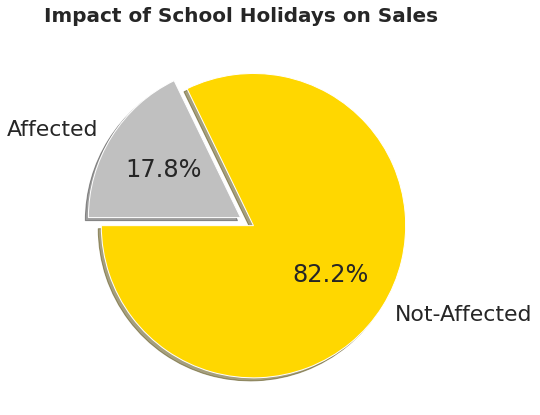

In [87]:
# Pie chart for schoolholiday

plt.figure(figsize=(15,8))
plt.subplot(121)
labels = 'Not-Affected' , 'Affected'
sizes = df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Impact of School Holidays on Sales",size=20,fontdict={"weight": "bold"})

**Here we can see that 17.8% of the sales gets affected by the school holidays which also means that around 17% of the sales are oriented from the school students.**

# Key Findings From EDA


---


* Store Model 'a'have the maximum number of sales and store counts followed by 'd' while Store Model 'b' have the least number of sales and store counts.

* Store model 'b' have least number of store counts and sales still performs quite well on average sales and customers compared to other store models.

* Basic Assortment level have the maximum number of sales and store counts followed by Extended level while Extra Assortment have the least number of sales and store counts

* Assortment level 'b' with least store counts and sales have perform quite well compared to 'a'. While there is an another surprising fact that assortment level 'c' have maximum number of sales with the least number of customers.

* Store Model "b" have the maximum number of sales at all assortment level and surprisingly Assortment Level "b" is only available in Store Level "b".

* There is a linear relationship between customer and sales and it is also noticeable that whenever promo was open, the store has higher sales and customer compared to the period when promo was closed, which means promo had good impact on the sales.

* Sales are highest on 30th followed by 2nd and 4th date of every month while sales are lowest on the 1st date of every month followed by 25th and 26th date.

*  Sales are maximum on Mondays while sales are completely zero on Sundays because it seems like store use to remain closed on Sundays.

*  Promo had been provided to the customers throughout the weekdays reason why sales were also high but sales on weekends were very low as promo weren't provided to the customers.

* Sales and Customers are at peak during November and December due to festive season like Christmas while sales are at lowest during January and May or we may say these months to be off season.

* During public holidays store made more sales compared to Easter and Christmas holidays.

* Around 17.8% of the sales gets affected by the school holidays which also means that almost 17% of the sales are oriented from the school students.



# **5. Feature Engineering**


---



###**Feature Selection**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efce7a0d710>,
      dtype=object)

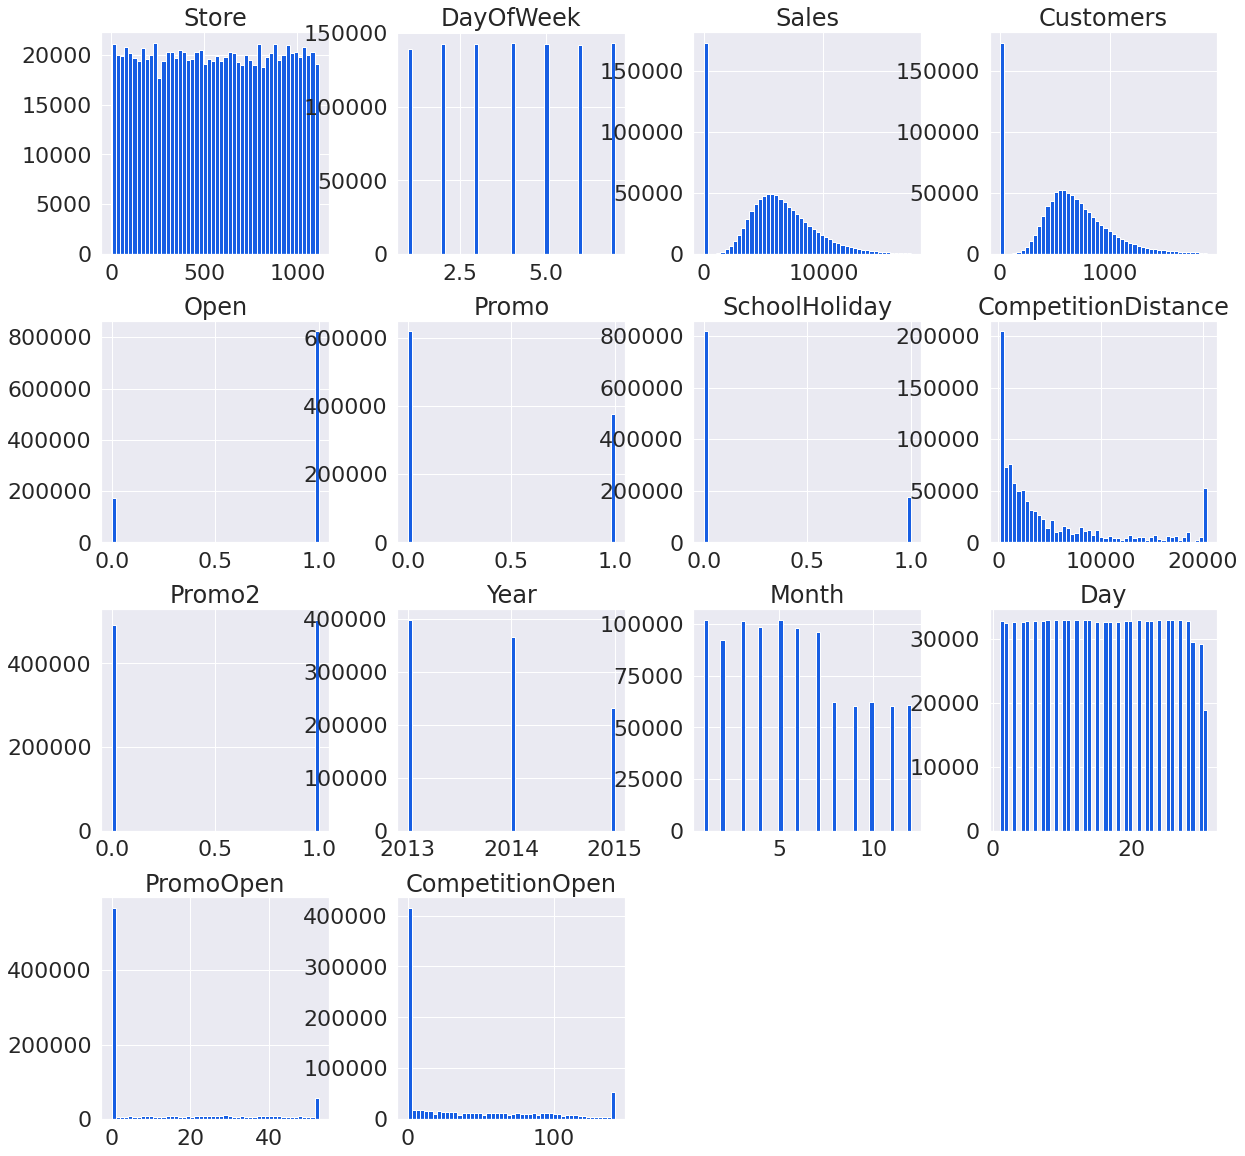

In [88]:
# Checking Distribution Of All Features 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

df.hist(figsize = (20,20),bins=50,color='#175ee3')

In [89]:
# Dropped Store column as all its values are unique and won't help in prediction.
df=df.drop(["Store"], axis=1)

### **Multicollinearity**

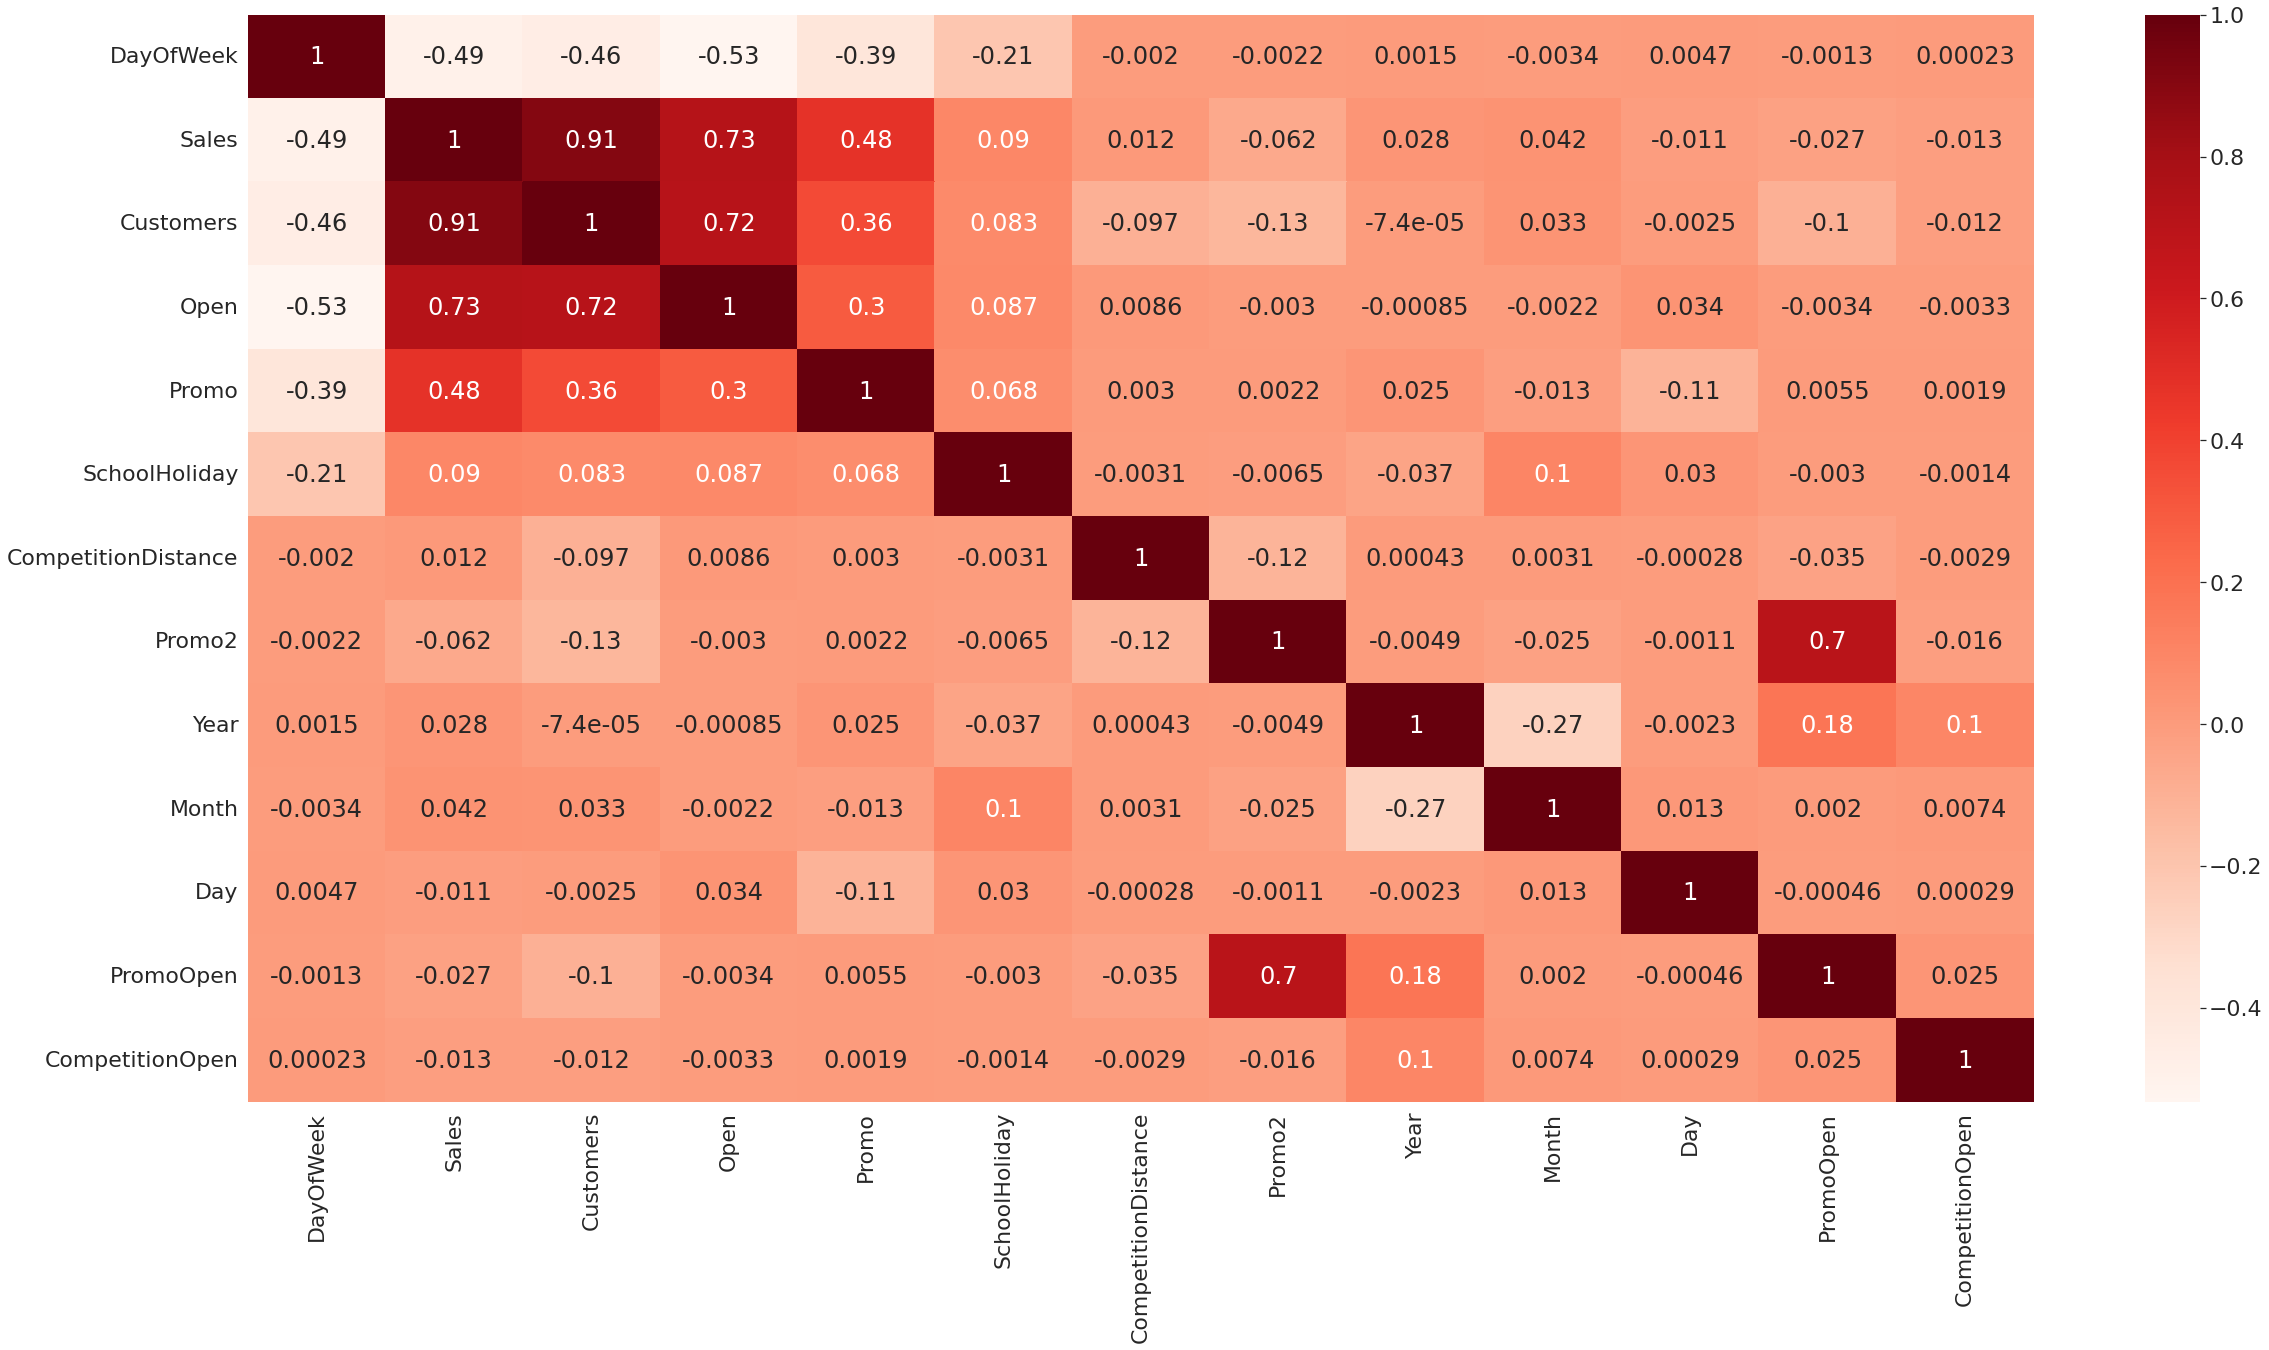

In [90]:
#let's analysize if there is any numerical corelation.

plt.figure(figsize=(40,20))
ml_corr = df.corr()
heatmap=sns.heatmap(ml_corr ,cbar=True,annot=True, cmap="Reds")

**We didn't find any correlation between independant variables but we found some correlation with our dependent feature which is a good sign for our model.**


### **Dependant Variable Transformation**

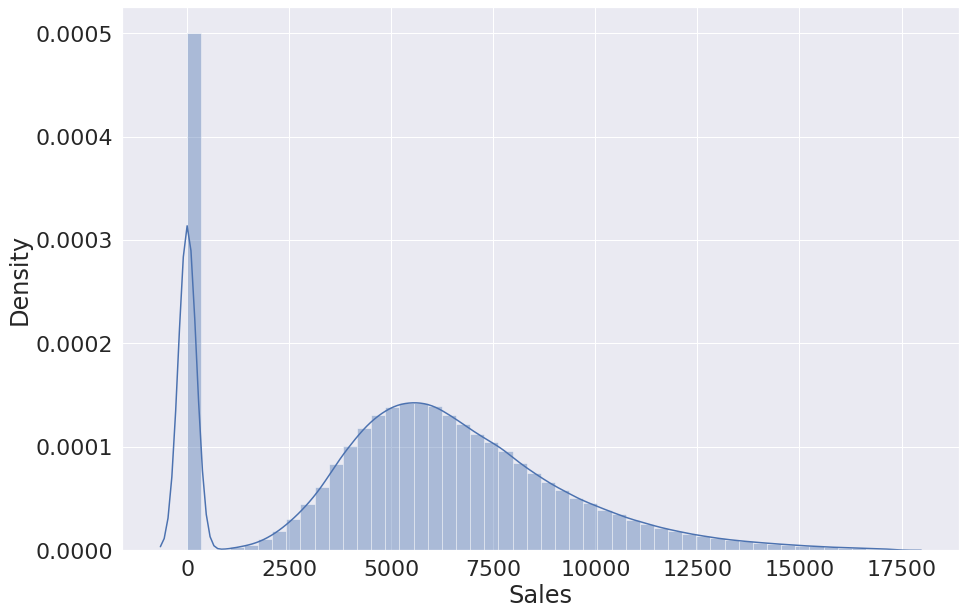

In [91]:
# Checking our sales column distribution
plt.figure(figsize=(15,10))
sns.distplot(df['Sales'])

In [92]:
# square root transformation of sales column
df['Sales'] = np.sqrt(df['Sales'])

**We have noticed that our sales column was right skewed so here we have used square root transformation to remove the skewness.**

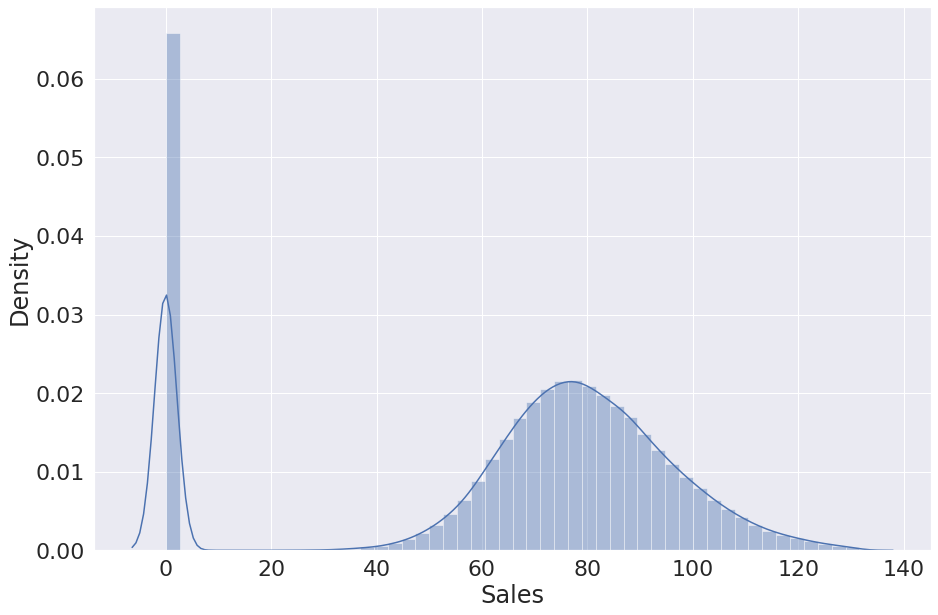

In [93]:
# Again checking our sales column distribution
plt.figure(figsize=(15,10))
sns.distplot(df['Sales'])

### **Scaling Numerical Columns**

In [94]:
# Scaling and Fitting Our Numerical Columns
numerical_cols = ['Customers','CompetitionDistance','Year','Month','DayOfWeek','Day','CompetitionOpen','PromoOpen']
scaler = MinMaxScaler()
scaler.fit(df[numerical_cols])
df[numerical_cols] = scaler.transform(df[numerical_cols])

In [95]:
# Our Dataframe After Scaling
df.head(5)

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Year,Month,Day,PromoOpen,CompetitionOpen
0,0.666667,72.546537,0.293962,1,1,0,1,c,a,0.055802,0,0,1.0,0.545455,1.000000,0.0,0.577465
1,0.500000,70.851958,0.289195,1,1,0,1,c,a,0.055802,0,0,1.0,0.545455,0.966667,0.0,0.577465
2,0.333333,69.152006,0.277013,1,1,0,1,c,a,0.055802,0,0,1.0,0.545455,0.933333,0.0,0.577465
3,0.166667,70.788417,0.296610,1,1,0,1,c,a,0.055802,0,0,1.0,0.545455,0.900000,0.0,0.577465
4,0.000000,78.115299,0.324153,1,1,0,1,c,a,0.055802,0,0,1.0,0.545455,0.866667,0.0,0.577465


### **Dummificaton**

In [96]:
# Concise Summary Of The Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996977 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            996977 non-null  float64
 1   Sales                996977 non-null  float64
 2   Customers            996977 non-null  float64
 3   Open                 996977 non-null  int64  
 4   Promo                996977 non-null  int64  
 5   StateHoliday         996977 non-null  object 
 6   SchoolHoliday        996977 non-null  int64  
 7   StoreType            996977 non-null  object 
 8   Assortment           996977 non-null  object 
 9   CompetitionDistance  996977 non-null  float64
 10  Promo2               996977 non-null  int64  
 11  PromoInterval        996977 non-null  object 
 12  Year                 996977 non-null  float64
 13  Month                996977 non-null  float64
 14  Day                  996977 non-null  float64
 15  PromoOpen       

In [97]:
# Converting catagorical variables into dummy integers
df = pd.get_dummies(columns = ['StateHoliday','StoreType','Assortment','PromoInterval',], data = df, drop_first = True)

In [98]:
# Checking our dataset
df.head(5)

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,...,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,0.666667,72.546537,0.293962,1,1,1,0.055802,0,1.0,0.545455,...,0,0,0,1,0,0,0,0,0,0
1,0.500000,70.851958,0.289195,1,1,1,0.055802,0,1.0,0.545455,...,0,0,0,1,0,0,0,0,0,0
2,0.333333,69.152006,0.277013,1,1,1,0.055802,0,1.0,0.545455,...,0,0,0,1,0,0,0,0,0,0
3,0.166667,70.788417,0.296610,1,1,1,0.055802,0,1.0,0.545455,...,0,0,0,1,0,0,0,0,0,0
4,0.000000,78.115299,0.324153,1,1,1,0.055802,0,1.0,0.545455,...,0,0,0,1,0,0,0,0,0,0


# **6. ML Model**

---



## **Train-Test Split**

In [99]:
# x is Independent variable
x = df.loc[:,df.columns!='Sales'] 

# y is Dependent variable
y = df['Sales']

In [100]:
# Checking the shape of our dataset 
df.shape

(996977, 24)

In [101]:
# Spitting our data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [102]:
# Checking the shape of the train-test dataset
print(x_train.shape,x_test.shape)

(797581, 23) (199396, 23)


## **Model Training and Prediction**

### **1. Linear Regression**

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression

In [103]:
# Fitting the data into Linear Regression Model
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [104]:
# Model Prediction
y_pred = reg.predict(x_test)
r2_score(y_pred,y_test)

0.9613526984067895

In [105]:
# Storing Mean Of Dependant Variable
sales_mean=df["Sales"].mean()

In [106]:
#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test,y_pred),6)
print("MAE :" , MAE)

# Mean Squared Error or MSE
MSE  = round(mean_squared_error(y_test, y_pred),6)
print("MSE :" , MSE)

# Root Mean Squared Error or RMSE
RMSE = round(np.sqrt(MSE),6)
print("RMSE :" ,RMSE)

# Root Mean Squared Error or RMSE
RMPSE = round((RMSE/sales_mean),6)
print("RMPSE :",RMPSE)

# R2
r2 = round(r2_score(y_test, y_pred),6)
print("R2 :" ,r2)

# Adjusted_r
Adjusted_r2 = round(1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)
print("Adjusted R2 :" , Adjusted_r2)

MAE : 5.075486
MSE : 42.034368
RMSE : 6.483392
RMPSE : 0.097556
R2 : 0.96282
Adjusted R2 : 0.962816


**CROSS VALIDATION**

As you know in KNN method we use train test split with random_state that split exactly same at each time. However, if we do not use random_state, data is split differently at each time and according to split accuracy will be different. Therefore, we can conclude that model performance is dependent on train_test_split. For example you split, fit and predict data 5 times and accuracies are 0.89, 0.9, 0.91, 0.92 and 0.93, respectively. Which accuracy do you use? Do you know what accuracy will be at 6th times split, train and predict. The answer is I do not know but if I use cross validation I can find acceptable accuracy.
Cross Validation (CV)

K folds = K fold CV.

When K is increase, computationally cost is increase

cross_val_score(LR_model,x,y,cv=5): use reg(linear regression) with x and y that we define at above and K is 5. It means 5 times(split, train,predict)

In [107]:
# Importing 
from sklearn.model_selection import cross_val_score

# Cross validation
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.96680833 0.9632199  0.95998278 0.95947582 0.96263553]
CV scores average:  0.9624244721691717


### **2. Lasso Regression**

**Lasso regression** is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

In [108]:
# Model Training
lass = Lasso(alpha = 1.0, max_iter = 2000)
lass.fit(x_train,y_train)

Lasso(max_iter=2000)

In [109]:
# Model Prediction
prediction_lasso = lass.predict(x_test)
r2_score(prediction_lasso,y_test)

0.8950667703773365

In [110]:
#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, prediction_lasso),6)
print("MAE :" , MAE)

# Mean Squared Error or MSE
MSE  = round(mean_squared_error(y_test, prediction_lasso),6)
print("MSE :" , MSE)

# Root Mean Squared Error or RMSE
RMSE = round(np.sqrt(MSE),6)
print("RMSE :" ,RMSE)

# Root Mean Squared Error or RMSE
RMPSE = round((RMSE/sales_mean),6)
print("RMPSE :",RMPSE)

# R2
r2 = round(r2_score(y_test, prediction_lasso),6)
print("R2 :" ,r2)

# Adjusted_r
Adjusted_r2 = round(1 - (1-r2_score(y_test, prediction_lasso)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)
print("Adjusted R2 :" , Adjusted_r2)

MAE : 7.408086
MSE : 87.156074
RMSE : 9.335742
RMPSE : 0.140476
R2 : 0.92291
Adjusted R2 : 0.922901


### **3. Ridge Regression**

**Ridge regression** is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

In [111]:
# Model Training
ridge = Ridge(alpha = 0.5, fit_intercept = True,random_state=0)
ridge.fit(x_train, y_train)

Ridge(alpha=0.5, random_state=0)

In [112]:
# Model Prediction
pred_ridge =ridge.predict(x_test)
r2_score(pred_ridge, y_test)

0.9613522437026605

In [113]:
#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, pred_ridge),6)
print("MAE :" , MAE)

# Mean Squared Error or MSE
MSE  = round(mean_squared_error(y_test, pred_ridge),6)
print("MSE :" , MSE)

# Root Mean Squared Error or RMSE
RMSE = round(np.sqrt(MSE),6)
print("RMSE :" ,RMSE)

# Root Mean Squared Error or RMSE
RMPSE = round((RMSE/sales_mean),6)
print("RMPSE :",RMPSE)

# R2
r2 = round(r2_score(y_test, pred_ridge),6)
print("R2 :" ,r2)

# Adjusted_r
Adjusted_r2 = round(1 - (1-r2_score(y_test, pred_ridge)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)
print("Adjusted R2 :" , Adjusted_r2)

MAE : 5.07548
MSE : 42.034365
RMSE : 6.483391
RMPSE : 0.097556
R2 : 0.96282
Adjusted R2 : 0.962816


### **4. Decision Tree Regression**

**Decision tree** builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

In [114]:
# Model Training
des_regressor = DecisionTreeRegressor(random_state=0)
des_regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [115]:
# Model Prediction
y_pred_des = des_regressor.predict(x_test)
r2_score(y_pred_des, y_test)

0.9878231618689846

In [116]:
#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, y_pred_des),6)
print("MAE :" , MAE)

# Mean Squared Error or MSE
MSE  = round(mean_squared_error(y_test, y_pred_des),6)
print("MSE :" , MSE)

# Root Mean Squared Error or RMSE
RMSE = round(np.sqrt(MSE),6)
print("RMSE :" ,RMSE)

# Root Mean Squared Error or RMSE
RMPSE = round((RMSE/sales_mean),6)
print("RMPSE :",RMPSE)

# R2
r2 = round(r2_score(y_test, y_pred_des),6)
print("R2 :" ,r2)

# Adjusted_r
Adjusted_r2 = round(1 - (1-r2_score(y_test, y_pred_des)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)
print("Adjusted R2 :" , Adjusted_r2)

MAE : 2.395908
MSE : 13.760884
RMSE : 3.709567
RMPSE : 0.055818
R2 : 0.987828
Adjusted R2 : 0.987827


### **5. Random Forest Regression**

**Random Forest Regression** is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [ ]:
# Model Training And Prediction

random_forest=RandomForestRegressor(n_estimators =500,max_depth=8)
random_forest.fit(x_train, y_train)
v_pred_rf=random_forest.predict(x_test)

In [ ]:
#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, v_pred_rf),6)
print("MAE :" , MAE)

# Mean Squared Error or MSE
MSE  = round(mean_squared_error(y_test, v_pred_rf),6)
print("MSE :" , MSE)

# Root Mean Squared Error or RMSE
RMSE = round(np.sqrt(MSE),6)
print("RMSE :" ,RMSE)

# Root Mean Squared Error or RMSE
RMPSE = round((RMSE/sales_mean),6)
print("RMPSE :",RMPSE)

# R2
r2 = round(r2_score(y_test, v_pred_rf),6)
print("R2 :" ,r2)

# Adjusted R2
Adjusted_r2 = round(1 - (1-r2_score(y_test, v_pred_rf)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)
print("Adjusted R2 :" , Adjusted_r2)

### **6. Gradient Boosting Regression**

**Gradient boosting** is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees. When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest. A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.

In [ ]:
# Model Training
gbc_reg = GradientBoostingRegressor(random_state =42)
gbc_reg.fit(x_train,y_train)

In [ ]:
# Model Prediction
y_pred_gb =gbc_reg.predict(x_test)
r2_score(y_pred_gb,y_test)


In [ ]:
#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, y_pred_gb),6)
print("MAE :" , MAE)

# Mean Squared Error or MSE
MSE  = round(mean_squared_error(y_test, y_pred_gb),6)
print("MSE :" , MSE)

# Root Mean Squared Error or RMSE
RMSE = round(np.sqrt(MSE),6)
print("RMSE :" ,RMSE)

# Root Mean Squared Error or RMSE
RMPSE = round((RMSE/sales_mean),6)
print("RMPSE :",RMPSE)

# R2
r2 = round(r2_score(y_test, y_pred_gb),6)
print("R2 :" ,r2)

# Adjusted R2
Adjusted_r2 = round(1 - (1-r2_score(y_test, y_pred_gb)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)
print("Adjusted R2 :" , Adjusted_r2)

### **7. XGboost Regression**

**XGBoost** is a powerful approach for building supervised regression models. The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics.

In [ ]:
# Model Training
xgb_reg=XGBRegressor(max_depth=5,n_estimators=100,learning_rate=0.3,n_jobs=-1)   #Change estimators to 1000
xgb_reg.fit(x_train,y_train)

In [ ]:
# Model Prediction
y_pred_xgb =xgb_reg.predict(x_test)
r2_score(y_pred_xgb,y_test)


In [ ]:
#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, y_pred_xgb),6)
print("MAE :" , MAE)

# Mean Squared Error or MSE
MSE  = round(mean_squared_error(y_test, y_pred_xgb),6)
print("MSE :" , MSE)

# Root Mean Squared Error or RMSE
RMSE = round(np.sqrt(MSE),6)
print("RMSE :" ,RMSE)

# Root Mean Squared Error or RMSE
RMPSE = round((RMSE/sales_mean),6)
print("RMPSE :",RMPSE)

# R2
r2 = round(r2_score(y_test, y_pred_xgb),6)
print("R2 :" ,r2)

# Adjusted R2
Adjusted_r2 = round(1 - (1-r2_score(y_test, y_pred_xgb)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)
print("Adjusted R2 :" , Adjusted_r2)

#**7. Conclusions**

---


1. Store model 'b' have least number of stores in Rossmann yet it performed well and made more sales than other store models so it is advisable to increase the number of 'b' store model. 

2. Assortment level 'Basic' have the maximum number of stores in Rossmann yet it performed very badly but at the same time 'Extra' and 'Extended' assortment level with less number of store had preformed extra ordinarily so it would be advisable to increase these assortment level.

3. Linear relationship have been found among customer, sales and promo.And it has been seen that most of the customers came for shopping during the promo days as the cost was lower on those days. So promo should be initiated to more stores to increase the sales.

4. Sales has been low on the initial days of the month as compared to the end days, it can be assumed that people used to shop for the next month at the end of the previous month. Those products can be mainly be of basic necessities of a person's daily life.

5. Average sales on weekdays was more as compared to weekends because  promo's were provided to the customers during weekdays to increse the sales and not to weekends and reason might be that store use to remain close on Sundays.

6. Sales during November and December month was more high compared to other months and that can be due to festive season in western European countries.

7. School holidays also influence the sales a lot as it can be observed that 17.8% of the sales gets affected by the school holidays which also means that around 17% of the sales are oriented from the school students. 

8. After performing various regression techniques on our predictive model and we found out that XGboost regression and Decision Tree regression has performed better than any other regression model with a 98.8% and 98.7% respectively.
